## Data Creation

In [1]:
from sklearn.datasets import make_blobs

# create random data
X, y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)

In [2]:
# view the data
X[:10], y[:10]

(array([[ 2.26403424,  1.82613379],
        [-0.97647444,  2.59138889],
        [ 1.10046838,  4.02254067],
        [-2.82715074,  7.11970523],
        [ 1.53393915,  0.31915668],
        [ 0.98362009,  5.55389667],
        [-1.74452433,  2.98606238],
        [ 0.35482006,  2.9172298 ],
        [ 1.83747356,  5.14545322],
        [ 1.48663347,  4.39407536]]), array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0]))

## Data Preprocessing

In [3]:
# the dataset seem to contain highly skewed values, i.e, there is a large value as 7 and small value as -2.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [4]:
# After using StandardScaler, the values are not much skewed
X[:10]

array([[ 1.33764657, -0.85151802],
       [-0.569738  , -0.55074364],
       [ 0.6527641 ,  0.01175348],
       [-1.65905814,  1.22905703],
       [ 0.90790783, -1.44381738],
       [ 0.58398644,  0.61363468],
       [-1.02181718, -0.39562194],
       [ 0.21387063, -0.42267576],
       [ 1.08657016,  0.45310085],
       [ 0.8800634 ,  0.15778076]])

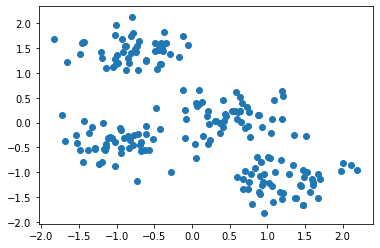

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1])

## From scratch

In [6]:
def DBSCAN(D, eps, minpts):
  index = [0] * len(D)
  cluster_id = 0
# D = data and point = index of a particular data point
# cluster is assigned in index
  for point in range(0, len(D)):
    # do not visit already visited points or the points with already assigned cluster id.
    if not index[point] == 0:
      continue

    neighborpts = get_neighbors(D, point, eps)

    if len(neighborpts) < minpts:
      index[point] = -1
    else:
      cluster_id += 1
      grow_cluster(D, index, point, neighborpts, cluster_id, eps, minpts)
      
  return index

In [7]:
import numpy as np
def get_neighbors(D, point, eps):
  neighbors = []
# append the points if the distance is less than eps
  for point_n in range(0, len(D)):
    # if the euclidean distance is less than eps, it's the minpt.
    if np.linalg.norm(D[point] - D[point_n]) < eps:
      neighbors.append(point_n)
  return neighbors

In [8]:
def grow_cluster(D, index, point, neighborpts, cluster_id, eps, minpts):
# for each neighborpts, if label is -1, it's a boundary point so, change the cluster index
# if the index is unlabelled, assign it the value of new cluster
# if the index is unvisited and it's a core point, add it to the cluster as well
# add all the neighbors to a cluster
  index[point] = cluster_id
  
  i = 0
  while i < len(neighborpts):
    point_n = neighborpts[i]
    # boundary point
    if index[point_n] == -1:
      index[point_n] = cluster_id
    
    # if the point is unvisited
    elif index[point_n] == 0:
      index[point_n] = cluster_id

      Pnneighbors = get_neighbors(D, point_n, eps) 

      if len(Pnneighbors) >= minpts:
        neighborpts = neighborpts + Pnneighbors

    i +=1

In [9]:
model_scratch = DBSCAN(X, 0.3, 9)

In [10]:
dic = {1:0, 2:1, 3:2, 4:3}

model_scratch_new = [dic.get(n, n) for n in model_scratch]

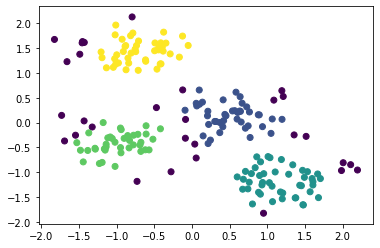

In [11]:
plt.scatter(X[:,0], X[:,1], c = model_scratch_new)

In [12]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model_scratch_new)
print("Accuracy score is", acc)

Accuracy score is 0.85


## From sklearn

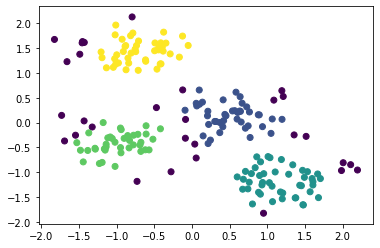

In [13]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3, min_samples=9)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c = model.labels_)

In [14]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.85
